### Machine Failure Dataset Project

In [158]:
from warnings import filterwarnings
filterwarnings('ignore')

In [159]:
import pandas as pd
df = pd.read_csv('train.csv')
df.head()

,id,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,0,L50096,L,300.6,309.6,1596,36.1,140,0,0,0,0,0,0
1,1,M20343,M,302.6,312.1,1759,29.1,200,0,0,0,0,0,0
2,2,L49454,L,299.3,308.5,1805,26.5,25,0,0,0,0,0,0
3,3,L53355,L,301.0,310.9,1524,44.3,197,0,0,0,0,0,0
4,4,M24050,M,298.0,309.0,1641,35.4,34,0,0,0,0,0,0


In [160]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136429 entries, 0 to 136428
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       136429 non-null  int64  
 1   Product ID               136429 non-null  object 
 2   Type                     136429 non-null  object 
 3   Air temperature [K]      136429 non-null  float64
 4   Process temperature [K]  136429 non-null  float64
 5   Rotational speed [rpm]   136429 non-null  int64  
 6   Torque [Nm]              136429 non-null  float64
 7   Tool wear [min]          136429 non-null  int64  
 8   Machine failure          136429 non-null  int64  
 9   TWF                      136429 non-null  int64  
 10  HDF                      136429 non-null  int64  
 11  PWF                      136429 non-null  int64  
 12  OSF                      136429 non-null  int64  
 13  RNF                      136429 non-null  int64  
dtypes: f

### Check Missing Values

In [161]:
s = df.isna().sum()
s

id                         0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Machine failure            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
dtype: int64

### Seperate X and Y 

In [162]:
X = df.drop(columns=['id', 'Product ID', 'Machine failure'])
Y = df[['Machine failure']]

In [163]:
X.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,RNF
0,L,300.6,309.6,1596,36.1,140,0,0,0,0,0
1,M,302.6,312.1,1759,29.1,200,0,0,0,0,0
2,L,299.3,308.5,1805,26.5,25,0,0,0,0,0
3,L,301.0,310.9,1524,44.3,197,0,0,0,0,0
4,M,298.0,309.0,1641,35.4,34,0,0,0,0,0


In [164]:
Y.head()

,Machine failure
0,0
1,0
2,0
3,0
4,0


In [165]:
Y.value_counts()

Machine failure
0                  134281
1                    2148
Name: count, dtype: int64

### Seperate Cat and Con Features

In [166]:
cat = list(X.columns[X.dtypes=='object'])
con = list(X.columns[X.dtypes!='object'])

In [167]:
cat

['Type']

In [168]:
con

['Air temperature [K]',
 'Process temperature [K]',
 'Rotational speed [rpm]',
 'Torque [Nm]',
 'Tool wear [min]',
 'TWF',
 'HDF',
 'PWF',
 'OSF',
 'RNF']

### Create a Preprocessing Pipeline

In [169]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.compose import ColumnTransformer

In [170]:
# num pipe
num_pipe1 = Pipeline(steps=[('impute',SimpleImputer(strategy='median')),
                            ('scaler',StandardScaler())])

# cat pipe
cat_pipe1 = Pipeline(steps=[('impute',SimpleImputer(strategy='constant',fill_value='unknown')),
                            ('ordinal',OrdinalEncoder())])

# fit cat and con
pre1 = ColumnTransformer([('num',num_pipe1,con),
                         ('cat',cat_pipe1, cat)])

In [171]:
X_pre = pre1.fit_transform(X)
X_pre

array([[ 0.3958803 , -0.24623038,  0.54541592, ..., -0.06303833,
        -0.04756777,  1.        ],
       [ 1.46985559,  1.55860483,  1.72030819, ..., -0.06303833,
        -0.04756777,  2.        ],
       [-0.30220363, -1.04035788,  2.05187289, ..., -0.06303833,
        -0.04756777,  1.        ],
       ...,
       [ 0.34218154,  1.34202461,  0.0264451 , ..., -0.06303833,
        -0.04756777,  1.        ],
       [ 0.98656671,  0.69228393, -0.52856537, ..., -0.06303833,
        -0.04756777,  1.        ],
       [-1.59097397, -1.32913151,  0.26430672, ..., -0.06303833,
        -0.04756777,  1.        ]])

In [172]:
cols = pre1.get_feature_names_out()
cols

array(['num__Air temperature [K]', 'num__Process temperature [K]',
       'num__Rotational speed [rpm]', 'num__Torque [Nm]',
       'num__Tool wear [min]', 'num__TWF', 'num__HDF', 'num__PWF',
       'num__OSF', 'num__RNF', 'cat__Type'], dtype=object)

In [173]:
X_pre = pd.DataFrame(X_pre, columns=cols)
X_pre

,num__Air temperature [K],num__Process temperature [K],num__Rotational speed [rpm],num__Torque [Nm],num__Tool wear [min],num__TWF,num__HDF,num__PWF,num__OSF,num__RNF,cat__Type
0,0.395880,-0.246230,0.545416,-0.499711,0.556417,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,1.0
1,1.469856,1.558605,1.720308,-1.323028,1.494433,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,2.0
2,-0.302204,-1.040358,2.051873,-1.628831,-1.241447,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,1.0
3,0.610675,0.692284,0.026445,0.464745,1.447532,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,1.0
4,-1.000288,-0.679391,0.869773,-0.582043,-1.100744,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,2.0
...,...,...,...,...,...,...,...,...,...,...,...
136424,0.127386,1.053251,0.069693,-0.335048,1.650769,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,2.0
136425,-1.268781,-1.040358,-0.528565,1.029305,-1.601020,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0
136426,0.342182,1.342025,0.026445,-0.217431,1.713303,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,1.0
136427,0.986567,0.692284,-0.528565,0.699979,-0.975676,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,1.0


### Feature Selection with Mutual Info Scores

In [174]:
from sklearn.feature_selection import mutual_info_classif
mi = mutual_info_classif(X_pre, Y)
mi

array([0.00509111, 0.0017064 , 0.01977251, 0.01979836, 0.00645977,
       0.00761607, 0.02424242, 0.01112421, 0.01920127, 0.00103728,
       0.01057177])

In [175]:
mi = pd.Series(mi)
mi.index = X_pre.columns 
mi = mi.sort_values(ascending=False)
mi

num__HDF                        0.024242
num__Torque [Nm]                0.019798
num__Rotational speed [rpm]     0.019773
num__OSF                        0.019201
num__PWF                        0.011124
cat__Type                       0.010572
num__TWF                        0.007616
num__Tool wear [min]            0.006460
num__Air temperature [K]        0.005091
num__Process temperature [K]    0.001706
num__RNF                        0.001037
dtype: float64

<Axes: title={'center': 'Mutual Information Scores'}>

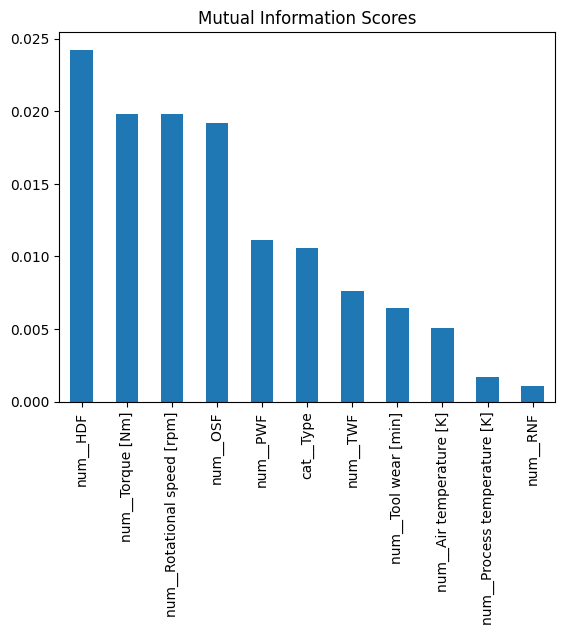

In [176]:
mi.plot(kind='bar', title='Mutual Information Scores')

In [177]:
sel_cols = list(mi.index)
sel_cols

['num__HDF',
 'num__Torque [Nm]',
 'num__Rotational speed [rpm]',
 'num__OSF',
 'num__PWF',
 'cat__Type',
 'num__TWF',
 'num__Tool wear [min]',
 'num__Air temperature [K]',
 'num__Process temperature [K]',
 'num__RNF']

In [178]:
from sklearn.feature_selection import SelectKBest
sel = SelectKBest(mutual_info_classif,k=5)
sel_features = sel.fit_transform(X_pre, Y)
sel_cols = sel.get_feature_names_out()

In [179]:
sel_cols

array(['num__Rotational speed [rpm]', 'num__Torque [Nm]', 'num__HDF',
       'num__OSF', 'cat__Type'], dtype=object)

In [180]:
sel_cols[0].split('__')[1]

'Rotational speed [rpm]'

In [181]:
imp_cols = []
for i in sel_cols:
    s = i.split('__')[1]
    imp_cols.append(s)

In [182]:
imp_cols

['Rotational speed [rpm]', 'Torque [Nm]', 'HDF', 'OSF', 'Type']

In [183]:
X_sel = X[imp_cols]
X_sel

,Rotational speed [rpm],Torque [Nm],HDF,OSF,Type
0,1596,36.1,0,0,L
1,1759,29.1,0,0,M
2,1805,26.5,0,0,L
3,1524,44.3,0,0,L
4,1641,35.4,0,0,M
...,...,...,...,...,...
136424,1530,37.5,0,0,M
136425,1447,49.1,0,0,H
136426,1524,38.5,0,0,L
136427,1447,46.3,0,0,L


### Create A final Pipeline

In [184]:
cat_sel = list(X_sel.columns[X_sel.dtypes=='object'])
con_sel = list(X_sel.columns[X_sel.dtypes!='object'])

In [185]:
cat_sel

['Type']

In [186]:
con_sel

['Rotational speed [rpm]', 'Torque [Nm]', 'HDF', 'OSF']

In [187]:
from sklearn.preprocessing import OneHotEncoder
num_pipe2 = Pipeline(steps=[('impute', SimpleImputer(strategy='median')),
                            ('scaler', StandardScaler())])

cat_pipe2 = Pipeline(steps=[('impute', SimpleImputer(strategy='constant', fill_value='unknown')),
                            ('ohe', OneHotEncoder(handle_unknown='ignore'))])

pre2 = ColumnTransformer([('num', num_pipe2, con_sel),
                          ('cat', cat_pipe2, cat_sel)])

In [188]:
X_sel_pre = pre2.fit_transform(X_sel)
X_sel_pre

array([[ 0.54541592, -0.49971115, -0.07202055, ...,  0.        ,
         1.        ,  0.        ],
       [ 1.72030819, -1.32302768, -0.07202055, ...,  0.        ,
         0.        ,  1.        ],
       [ 2.05187289, -1.62883096, -0.07202055, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [ 0.0264451 , -0.2174312 , -0.07202055, ...,  0.        ,
         1.        ,  0.        ],
       [-0.52856537,  0.69997864, -0.07202055, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.26430672, -0.12333789, -0.07202055, ...,  0.        ,
         1.        ,  0.        ]])

In [189]:
final_cols = pre2.get_feature_names_out()
final_cols


array(['num__Rotational speed [rpm]', 'num__Torque [Nm]', 'num__HDF',
       'num__OSF', 'cat__Type_H', 'cat__Type_L', 'cat__Type_M'],
      dtype=object)

In [190]:
X_sel_pre = pd.DataFrame(X_sel_pre, columns=final_cols)
X_sel_pre

,num__Rotational speed [rpm],num__Torque [Nm],num__HDF,num__OSF,cat__Type_H,cat__Type_L,cat__Type_M
0,0.545416,-0.499711,-0.072021,-0.063038,0.0,1.0,0.0
1,1.720308,-1.323028,-0.072021,-0.063038,0.0,0.0,1.0
2,2.051873,-1.628831,-0.072021,-0.063038,0.0,1.0,0.0
3,0.026445,0.464745,-0.072021,-0.063038,0.0,1.0,0.0
4,0.869773,-0.582043,-0.072021,-0.063038,0.0,0.0,1.0
...,...,...,...,...,...,...,...
136424,0.069693,-0.335048,-0.072021,-0.063038,0.0,0.0,1.0
136425,-0.528565,1.029305,-0.072021,-0.063038,1.0,0.0,0.0
136426,0.026445,-0.217431,-0.072021,-0.063038,0.0,1.0,0.0
136427,-0.528565,0.699979,-0.072021,-0.063038,0.0,1.0,0.0


### Train And Test The Data (Train Test Split)

In [191]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X_sel_pre, Y, test_size=0.2, random_state=42)


In [192]:
xtrain.shape

(109143, 7)

In [193]:
xtest.shape

(27286, 7)

### Algo Evaluation

In [194]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [195]:
dct = {'Logistic': LogisticRegression(),
       'Decision Tree': DecisionTreeClassifier(),
       'Random Forest': RandomForestClassifier(),
       'Gradient Boost': GradientBoostingClassifier()}

In [196]:
dct.items()

dict_items([('Logistic', LogisticRegression()), ('Decision Tree', DecisionTreeClassifier()), ('Random Forest', RandomForestClassifier()), ('Gradient Boost', GradientBoostingClassifier())])

In [197]:
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score
tr = []
tr_cv = []
ts = []
for name, model in dct.items():
    model.fit(xtrain,ytrain)
    ypred_tr = model.predict(xtrain)
    ypred_ts = model.predict(xtest)
    f1_tr = f1_score(ytrain,ypred_tr)
    tr.append(f1_tr)
    scores = cross_val_score(model,xtrain,ytrain,cv=5,scoring='f1')
    f1_cv = scores.mean()
    tr_cv.append(f1_cv)
    f1_ts = f1_score(ytest, ypred_ts)
    ts.append(f1_ts)
    print(f'Model Name : {name}\n')
    print(f'Training F1 : {f1_tr:.4f}')
    print(f'Training F1 CV : {f1_cv:.4f}')
    print(f'Testing F1 : {f1_ts:.4f}')
    print('\n=================================================\n')

Model Name : Logistic

Training F1 : 0.7155
Training F1 CV : 0.7160
Testing F1 : 0.6931


Model Name : Decision Tree

Training F1 : 0.9017
Training F1 CV : 0.6548
Testing F1 : 0.6659


Model Name : Random Forest

Training F1 : 0.9025
Training F1 CV : 0.7152
Testing F1 : 0.7175


Model Name : Gradient Boost

Training F1 : 0.7736
Training F1 CV : 0.7545
Testing F1 : 0.7406




### Create a df to show results

In [198]:
dct.keys()

dict_keys(['Logistic', 'Decision Tree', 'Random Forest', 'Gradient Boost'])

In [199]:
eval_dct = {'Model_name': list(dct.keys()),
            'Train F1': tr,
            'Test F1': ts,
            'Train F1 CV': tr_cv}

In [200]:
eval_df = pd.DataFrame(eval_dct)
eval_df

,Model_name,Train F1,Test F1,Train F1 CV
0,Logistic,0.715501,0.693098,0.716024
1,Decision Tree,0.901686,0.665857,0.654832
2,Random Forest,0.902493,0.717477,0.715195
3,Gradient Boost,0.773585,0.740638,0.754534


In [201]:
eval_df.sort_values(by='Test F1', ascending=False)

,Model_name,Train F1,Test F1,Train F1 CV
3,Gradient Boost,0.773585,0.740638,0.754534
2,Random Forest,0.902493,0.717477,0.715195
0,Logistic,0.715501,0.693098,0.716024
1,Decision Tree,0.901686,0.665857,0.654832


In [202]:
params = {'C':[0.01, 0.1, 1, 10, 50, 100, 1000]}

In [203]:
from sklearn.model_selection import RandomizedSearchCV
lr = LogisticRegression()
rscv = RandomizedSearchCV(lr, param_distributions=params, cv=5, scoring='f1')
rscv.fit(xtrain, ytrain)

RandomizedSearchCV(cv=5, estimator=LogisticRegression(),
                   param_distributions={'C': [0.01, 0.1, 1, 10, 50, 100, 1000]},
                   scoring='f1')

In [204]:
rscv.best_params_

{'C': 0.01}

In [205]:
rscv.best_score_

0.7170161455526497

In [206]:
best_lr = rscv.best_estimator_

In [207]:
best_lr

LogisticRegression(C=0.01)

### Evaluate Accuracy in train and test

In [233]:
best_lr.score(xtrain, ytrain)

0.9930274960373089

In [234]:
best_lr.score(xtest, ytest)

0.992413692003225

### Predict Result in Train and Test

In [210]:
ypred_tr = best_lr.predict(xtrain)
ypred_ts = best_lr.predict(xtest)

In [211]:
ypred_tr[0:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [212]:
ytrain.head()

,Machine failure
12407,0
85011,0
65292,0
18478,0
100267,0


In [213]:
ypred_ts[0:5]

array([1, 0, 0, 0, 0], dtype=int64)

In [214]:
ytest.head()

,Machine failure
123128,1
54705,0
40016,0
75025,0
120421,0


### Create a confusion Matrix for test

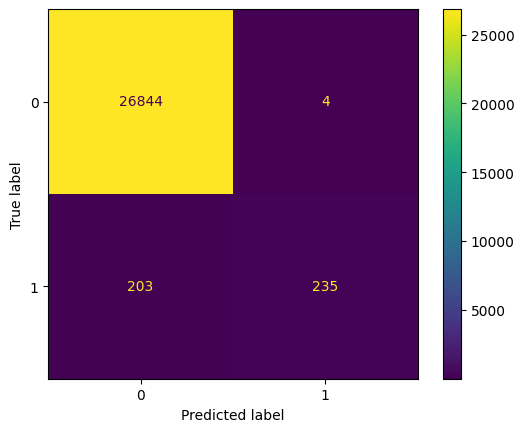

In [215]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cf = confusion_matrix(ytest, ypred_ts)
cfd = ConfusionMatrixDisplay(cf, display_labels=best_lr.classes_)
cfd.plot()

### Check Classification Report

In [216]:
from sklearn.metrics import classification_report
print(classification_report(ytest, ypred_ts))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00     26848
           1       0.98      0.54      0.69       438

    accuracy                           0.99     27286
   macro avg       0.99      0.77      0.85     27286
weighted avg       0.99      0.99      0.99     27286



### Plotting ROC - AUC curve in train and test

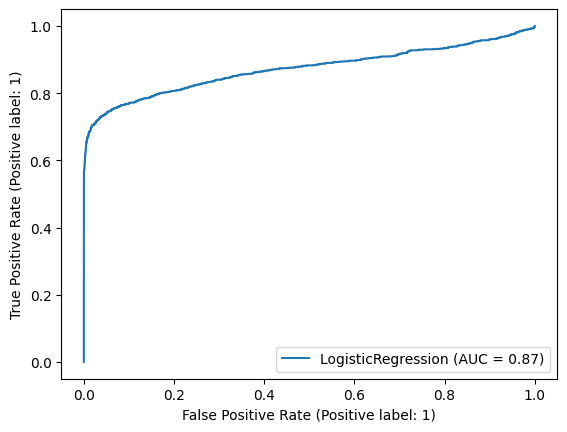

In [217]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_estimator(best_lr,xtrain,ytrain)

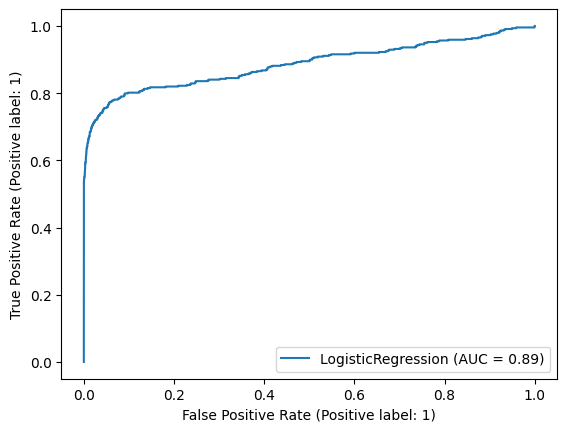

In [218]:
RocCurveDisplay.from_estimator(best_lr, xtest, ytest)

### Predict test.csv

In [219]:
xnew = pd.read_csv('test.csv')
xnew.head()

,id,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,RNF
0,136429,L50896,L,302.3,311.5,1499,38.0,60,0,0,0,0,0
1,136430,L53866,L,301.7,311.0,1713,28.8,17,0,0,0,0,0
2,136431,L50498,L,301.3,310.4,1525,37.7,96,0,0,0,0,0
3,136432,M21232,M,300.1,309.6,1479,47.6,5,0,0,0,0,0
4,136433,M19751,M,303.4,312.3,1515,41.3,114,0,0,0,0,0


In [220]:
xnew.isna().sum()

id                         0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
dtype: int64

### To preprocess out of a sample data use pre.transform()

In [221]:
xnew_pre = pre2.transform(xnew)
xnew_pre

array([[-0.15375311, -0.27623953, -0.07202055, ...,  0.        ,
         1.        ,  0.        ],
       [ 1.3887435 , -1.35831267, -0.07202055, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.03365302, -0.31152452, -0.07202055, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [-0.13933725,  0.12365707, -0.07202055, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.09852438, -0.00572124, -0.07202055, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.09852438, -0.49971115, -0.07202055, ...,  0.        ,
         1.        ,  0.        ]])

In [222]:
xnew_pre = pd.DataFrame(xnew_pre,columns=final_cols)
xnew_pre.head()

,num__Rotational speed [rpm],num__Torque [Nm],num__HDF,num__OSF,cat__Type_H,cat__Type_L,cat__Type_M
0,-0.153753,-0.276240,-0.072021,-0.063038,0.0,1.0,0.0
1,1.388744,-1.358313,-0.072021,-0.063038,0.0,1.0,0.0
2,0.033653,-0.311525,-0.072021,-0.063038,0.0,1.0,0.0
3,-0.297912,0.852880,-0.072021,-0.063038,0.0,0.0,1.0
4,-0.038426,0.111895,-0.072021,-0.063038,0.0,0.0,1.0


In [223]:
preds = best_lr.predict(xnew_pre)

In [224]:
preds

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

### Probablity

In [225]:
proba = best_lr.predict_proba(xnew_pre)[:,1]
proba

array([0.00392648, 0.00398746, 0.00432058, ..., 0.00585529, 0.00608724,
       0.00376188])

### Save this predictions in dataframe

In [226]:
df_final = xnew[['id']]
df_final

,id
0,136429
1,136430
2,136431
3,136432
4,136433
...,...
90949,227378
90950,227379
90951,227380
90952,227381


In [227]:
df_final['Machine failure'] = preds

In [228]:
df_final['Probability'] = proba

In [229]:
df_final

,id,Machine failure,Probability
0,136429,0,0.003926
1,136430,0,0.003987
2,136431,0,0.004321
3,136432,0,0.009964
4,136433,0,0.005804
...,...,...,...
90949,227378,0,0.004796
90950,227379,0,0.003007
90951,227380,0,0.005855
90952,227381,0,0.006087


In [230]:
df_final.to_csv('Machine Failure Result.csv')

In [231]:
df_final['Machine failure'].value_counts()

Machine failure
0    90130
1      824
Name: count, dtype: int64

<Axes: xlabel='Machine failure'>

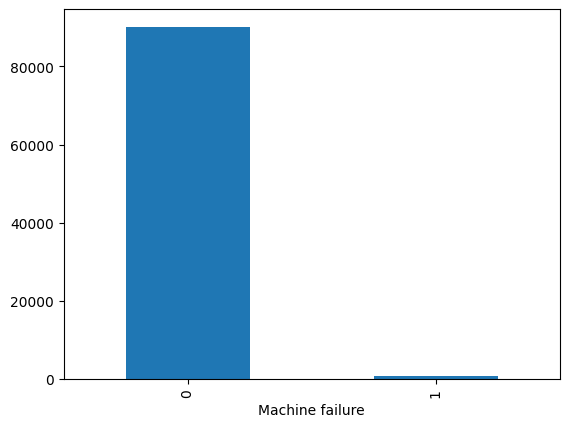

In [232]:
df_final['Machine failure'].value_counts().plot(kind='bar')